In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data  = pd.read_csv(r'E:\Projects\CTS\data\sample.csv')

In [3]:
# Example advanced function to calculate suitability score
def calculate_suitability(row):
    # Base weights for factors related to health conditions
    bp_weight = 0.5 if row['BP_Level'] > 0 else 0.2
    sugar_weight = 0.5 if row['Sugar_Level'] > 0 else 0.2
    bmi_weight = 0.34 if row['BMI'] > 25 else 0.2
    activity_weight = 0.34 if row['Activity_Level'] == 0 else 0.2
    alcohol_weight = 0.34 if row['alcohol'] > 0 else 0.1
    smoke_weight = 0.34 if row['Smoke'] > 0 else 0.1

    # Nutritional factors
    if row['BP_Level'] > 0:
        low_sodium = 1 if row['Sodium'] < 150 else 0
    else:
        low_sodium = 0.3
    if row['Sugar_Level'] > 0:
        low_sugar = 1 if row['SugarContent'] < 5 else 0
    else:
        low_sugar = 0.3
        
    balanced_macros = 1 if (row['Proteins'] >= 10 and row['Fat'] <= 15 and row['Carbs'] <= 50) else 0
    veg_bonus = 0.1
    nveg_penalty = 0
    if row['BP_Level'] > 0 or row['Sugar_Level'] > 0:
        # Veg dishes are considered healthier but slightly lower in protein and higher in carbs
        veg_bonus = 0.8 if row['DishCategory'] == 'Vegetarian' else 0.01

        # Penalties for NVeg (Non-Veg) dishes for health-conscious scoring
        nveg_penalty = 0.4 if row['DishCategory'] == 'Non-Vegetarian' else 0.01
    else:
        veg_bonus = 0.4
        nveg_penalty = 0.1
    # Calculate raw score based on weighted factors
    score = (bp_weight * low_sodium + sugar_weight * low_sugar +
             bmi_weight + activity_weight + alcohol_weight +
             smoke_weight + balanced_macros + veg_bonus - nveg_penalty)
    
    return score

# Step 1: Calculate the raw suitability scores using the custom function
data['RawSuitability'] = data.apply(calculate_suitability, axis=1)

# First Scaling as usual (0-10)
min_score = data['RawSuitability'].min()
max_score = data['RawSuitability'].max()
data['FirstSuitabilityScore'] = (data['RawSuitability'] - min_score) / (max_score - min_score) * 10

# Apply a non-linear transformation, such as log scaling or exponential
data['FinalSuitabilityScore'] = np.log1p(data['FirstSuitabilityScore'])  # Log transformation
data['FinalSuitabilityScore'] = (data['FinalSuitabilityScore'] - data['FinalSuitabilityScore'].min()) / \
                                (data['FinalSuitabilityScore'].max() - data['FinalSuitabilityScore'].min()) * 10
data['SuitabilityScore'] = data['FinalSuitabilityScore'].round(1)

data.drop(columns=['RawSuitability'], inplace=True)
data.drop(columns=['FirstSuitabilityScore'], inplace=True)
data.drop(columns=['FinalSuitabilityScore'], inplace=True)

In [4]:
data

,BP_Level,Sugar_Level,Age,Gender,BMI,Activity_Level,alcohol,Smoke,DishName,MajorIngredients,...,Fiber,Sodium,Potassium,Cholesterol,SugarContent,DietaryInfo,ServingSize,MealType,DishCategory,SuitabilityScore
0,0,0,46,0,32,0,1,1,Fish Curry Idli,"Rice, Urad Dal, Fish Curry",...,1.0,250,90,Moderate,4.949497,"Balanced meal, flavorful",2 pieces,Breakfast,Non-Vegetarian,9.5
1,1,0,56,0,28,0,0,0,Sambar Rice,"Rice, Lentils, Tamarind, Vegetables",...,5.0,350,200,Low,7.149650,"High fiber, nutrient-dense",1 bowl,Lunch,Vegetarian,7.6
2,1,0,67,0,50,1,0,1,Vegetable Stew,"Mixed Vegetables, Coconut Milk, Spices",...,3.0,200,150,Low,6.371837,"Creamy, rich in vitamins",1 bowl,Dinner,Vegetarian,7.8
3,1,1,57,0,23,1,0,0,Ragi Mudde,"Ragi Flour, Water, Ghee",...,2.0,50,100,Low,0.000000,"High in calcium, gluten-free",1 serving,Dinner,Vegetarian,8.9
4,1,0,54,0,22,0,0,1,Vada,"Urad Dal, Rice Flour",...,2.0,300,150,Moderate,6.371837,"Deep-fried, protein-rich",2 vadas,Breakfast,Vegetarian,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,90,1,20,1,0,0,Olan,"Ash Gourd, Coconut Milk, Black-eyed Peas",...,4.0,150,100,Low,4.949497,"Mild, rich in fiber and nutrients",1 bowl,Dinner,Vegetarian,6.9
4996,1,1,59,1,42,1,0,1,Ragi Mudde,"Ragi Flour, Water, Ghee",...,2.0,50,100,Low,0.000000,"High in calcium, gluten-free",1 serving,Dinner,Vegetarian,9.5
4997,0,1,63,1,27,0,0,1,Chicken 65,"Chicken, Spices, Oil",...,0.0,400,150,Moderate,0.000000,"Crispy, high protein",2 pieces,Dinner,Non-Vegetarian,6.4
4998,1,0,45,0,37,1,1,0,Idli,"Rice, Urad Dal",...,1.0,200,100,Low,4.949497,"Low fat, gluten-free",2 idlis,Breakfast,Vegetarian,7.8


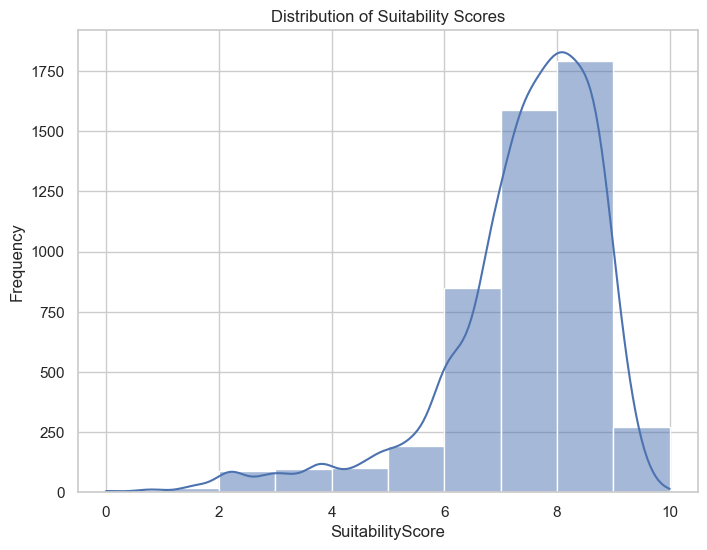

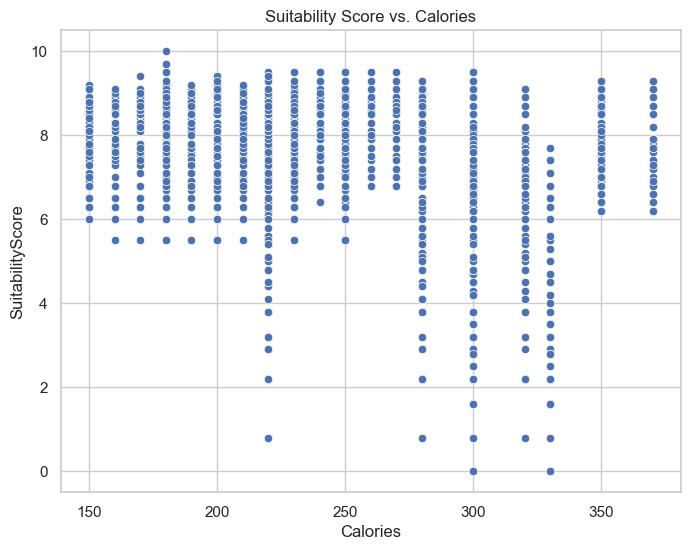

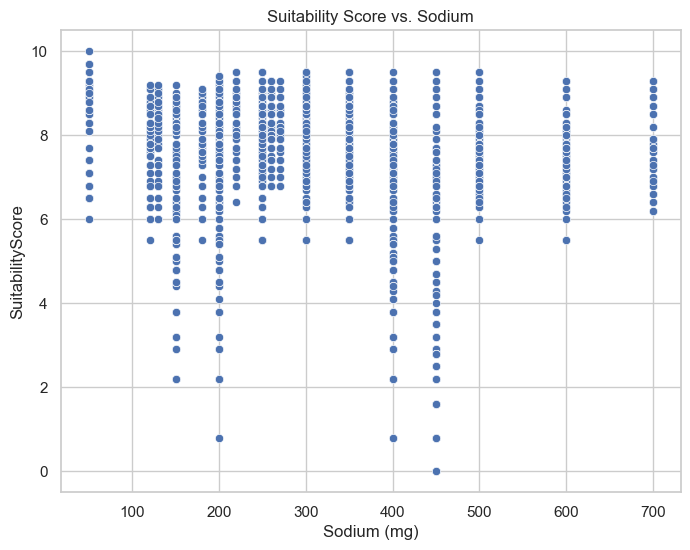

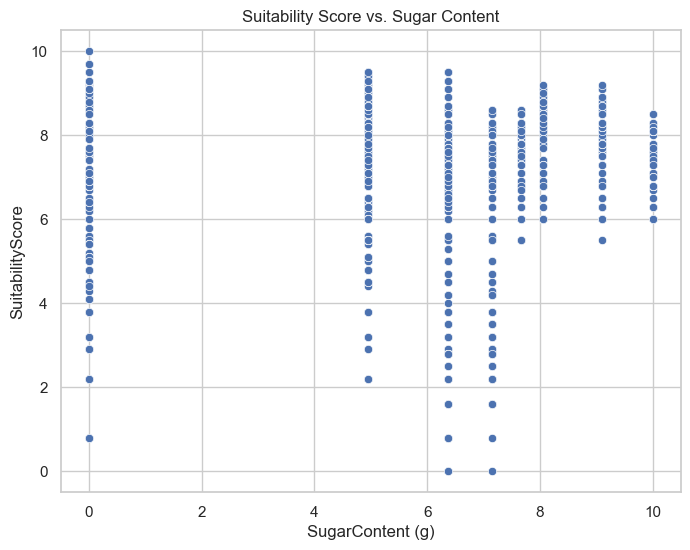

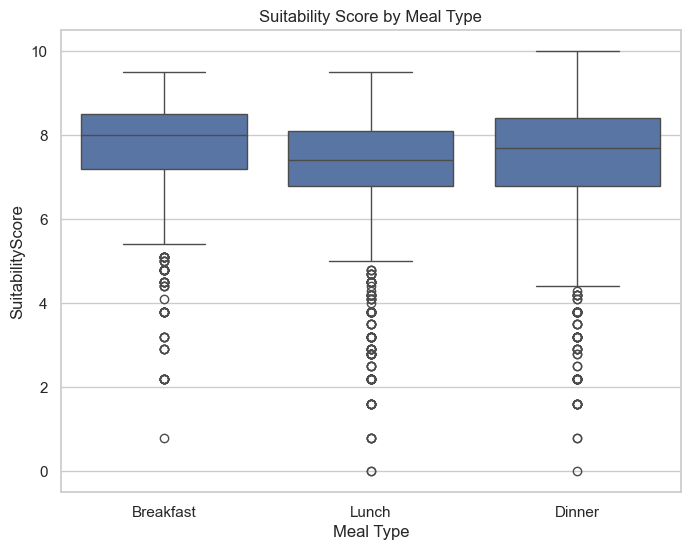

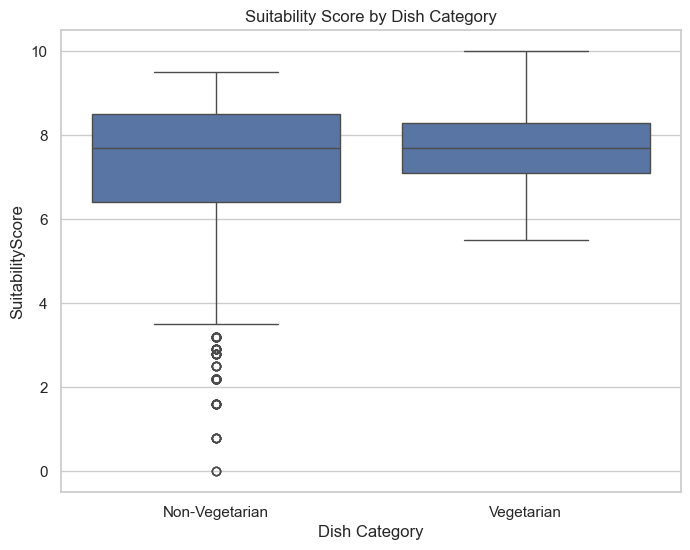

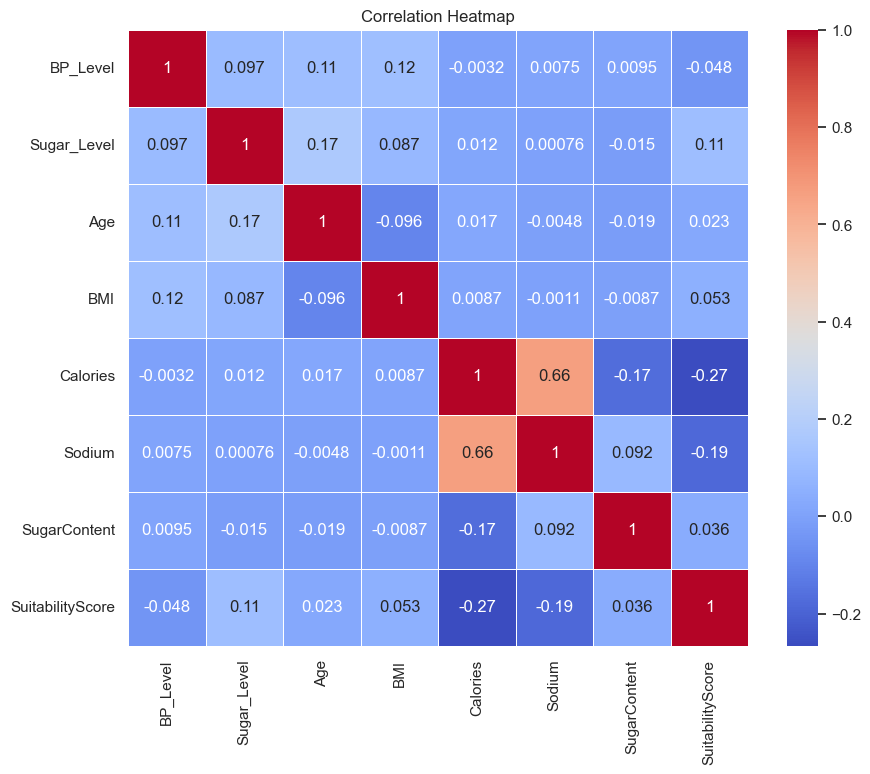

In [5]:
# Set Seaborn style for better visuals
sns.set(style='whitegrid')

### 1. Suitability Score Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data['SuitabilityScore'], bins=10, kde=True)
plt.title('Distribution of Suitability Scores')
plt.xlabel('SuitabilityScore')
plt.ylabel('Frequency')
plt.show()

### 2. Scatter plot: SuitabilityScore vs Calories
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories', y='SuitabilityScore', data=data)
plt.title('Suitability Score vs. Calories')
plt.xlabel('Calories')
plt.ylabel('SuitabilityScore')
plt.show()

### 3. Scatter plot: SuitabilityScore vs Sodium
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sodium', y='SuitabilityScore', data=data)
plt.title('Suitability Score vs. Sodium')
plt.xlabel('Sodium (mg)')
plt.ylabel('SuitabilityScore')
plt.show()

### 4. Scatter plot: SuitabilityScore vs SugarContent
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SugarContent', y='SuitabilityScore', data=data)
plt.title('Suitability Score vs. Sugar Content')
plt.xlabel('SugarContent (g)')
plt.ylabel('SuitabilityScore')
plt.show()

### 5. Box plot: SuitabilityScore by MealType
plt.figure(figsize=(8, 6))
sns.boxplot(x='MealType', y='SuitabilityScore', data=data)
plt.title('Suitability Score by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('SuitabilityScore')
plt.show()

### 6. Box plot: SuitabilityScore by DishCategory
plt.figure(figsize=(8, 6))
sns.boxplot(x='DishCategory', y='SuitabilityScore', data=data)
plt.title('Suitability Score by Dish Category')
plt.xlabel('Dish Category')
plt.ylabel('SuitabilityScore')
plt.show()

### 7. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[['BP_Level', 'Sugar_Level', 'Age', 'BMI', 'Calories', 'Sodium', 'SugarContent', 'SuitabilityScore']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.to_csv(r'E:\Projects\CTS\data\train_data.csv',index=False)